<a href="https://colab.research.google.com/github/AntoninaRemizova/ML/blob/main/ML_class_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Импорт библиотек и подготовка данных

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import lagrange, CubicSpline
from scipy import stats

In [ ]:
df = pd.read_excel("https://raw.githubusercontent.com/AntoninaRemizova/ML/refs/heads/main/Japan.xlsx")
df.head()

,Страна,Дата,Заражений,Выздоровлений,Смертей,Заражений за день,Выздоровлений за день,Смертей за день,Население страны,Тестов,Тестов за день
0,Япония,20.07.2020,25680,19603.0,988,418,392.0,2,127110047,562726,12114
1,Япония,21.07.2020,26312,20001.0,989,632,398.0,1,127110047,579083,16357
2,Япония,22.07.2020,27107,20482.0,990,795,481.0,1,127110047,587393,8310
3,Япония,23.07.2020,28088,20878.0,992,981,396.0,2,127110047,593088,5695
4,Япония,24.07.2020,28867,21173.0,995,779,295.0,3,127110047,602618,9530


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 609 entries, 0 to 608
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Страна                 609 non-null    object 
 1   Дата                   609 non-null    object 
 2   Заражений              609 non-null    int64  
 3   Выздоровлений          381 non-null    float64
 4   Смертей                609 non-null    int64  
 5   Заражений за день      609 non-null    int64  
 6   Выздоровлений за день  381 non-null    float64
 7   Смертей за день        609 non-null    int64  
 8   Население страны       609 non-null    int64  
 9   Тестов                 609 non-null    int64  
 10  Тестов за день         609 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 52.5+ KB


In [ ]:
df['Дата'] = pd.to_datetime(df['Дата'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 609 entries, 0 to 608
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Страна                 609 non-null    object        
 1   Дата                   609 non-null    datetime64[ns]
 2   Заражений              609 non-null    int64         
 3   Выздоровлений          381 non-null    float64       
 4   Смертей                609 non-null    int64         
 5   Заражений за день      609 non-null    int64         
 6   Выздоровлений за день  381 non-null    float64       
 7   Смертей за день        609 non-null    int64         
 8   Население страны       609 non-null    int64         
 9   Тестов                 609 non-null    int64         
 10  Тестов за день         609 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(7), object(1)
memory usage: 52.5+ KB


/tmp/ipython-input-3953363118.py:1: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Дата'] = pd.to_datetime(df['Дата'])


## Сохраним оригинальные значения точек

In [ ]:
TARGET_COL = 'Заражений за день'
DATE_COL = 'Дата'
df_original = df[[DATE_COL, TARGET_COL]].loc[70:95].copy()
df_original

,Дата,Заражений за день
70,2020-09-28,302
71,2020-09-29,527
72,2020-09-30,576
73,2020-10-01,633
74,2020-10-02,542
75,2020-10-03,574
76,2020-10-04,400
77,2020-10-05,279
78,2020-10-06,500
79,2020-10-07,506


## Создадим копию оригинального датафрейма с пропусками

In [ ]:
df_sparse = df_original.copy()
df_sparse.loc[df_sparse.index[1::2], TARGET_COL] = np.nan
df_sparse.head()

,Дата,Заражений за день
70,2020-09-28,302.0
71,2020-09-29,NaN
72,2020-09-30,576.0
73,2020-10-01,NaN
74,2020-10-02,542.0


## Создадим копию датафрейма с пропусками для заполнения

In [ ]:
df_filled = df_sparse.copy()

# Интерполяция

## Заполнение средним

In [ ]:
mean_val = df_filled[TARGET_COL].mean()
print(mean_val)


509.3076923076923


In [ ]:
df_filled[f'{TARGET_COL} (Среднее)'] = df_filled[TARGET_COL].fillna(mean_val)
df_filled[[DATE_COL, TARGET_COL, f'{TARGET_COL} (Среднее)']].head()

,Дата,Заражений за день,Заражений за день (Среднее)
70,2020-09-28,302.0,302.000000
71,2020-09-29,NaN,509.307692
72,2020-09-30,576.0,576.000000
73,2020-10-01,NaN,509.307692
74,2020-10-02,542.0,542.000000


## Заполнение медианой

In [ ]:
median_val = df_filled[TARGET_COL].median()
print(median_val)


542.0


In [ ]:
df_filled[f'{TARGET_COL} (Медиана)'] = df_filled[TARGET_COL].fillna(median_val)
df_filled[[DATE_COL, TARGET_COL, f'{TARGET_COL} (Медиана)']].head()

,Дата,Заражений за день,Заражений за день (Медиана)
70,2020-09-28,302.0,302.0
71,2020-09-29,NaN,542.0
72,2020-09-30,576.0,576.0
73,2020-10-01,NaN,542.0
74,2020-10-02,542.0,542.0


## Заполнение средним трёх предыдущих значений

In [ ]:
def fill_with_prev_mean(series, window=3):
    filled = series.copy()
    for i in range(len(series)):
        if pd.isna(series.iloc[i]):
            start_idx = max(0, i - window)
            prev_vals = series.iloc[start_idx:i]
            filled.iloc[i] = prev_vals.mean()
    return filled

df_filled[f'{TARGET_COL} (Среднее по 3м предыдущим)'] = fill_with_prev_mean(df_filled[TARGET_COL])
df_filled[[DATE_COL, TARGET_COL, f'{TARGET_COL} (Среднее по 3м предыдущим)']].head()

,Дата,Заражений за день,Заражений за день (Среднее по 3м предыдущим)
70,2020-09-28,302.0,302.0
71,2020-09-29,NaN,302.0
72,2020-09-30,576.0,576.0
73,2020-10-01,NaN,439.0
74,2020-10-02,542.0,542.0


## Метод Лагранжа

In [ ]:
df_filled = df_filled.reset_index(inplace = True, drop = True)
known_idx = df_filled[df_filled[TARGET_COL].notna()].index.values
known_vals = df_filled.loc[df_filled[TARGET_COL].notna(), TARGET_COL].values

poly = lagrange(known_idx, known_vals)
lagrange_vals = poly(df_filled.index.values)

df_filled[f'{TARGET_COL} (Лагранж)'] = lagrange_vals
df_filled[[DATE_COL, TARGET_COL, f'{TARGET_COL} (Лагранж)']].head()
print(known_idx, known_vals)
print(poly)

AttributeError: 'NoneType' object has no attribute 'reset_index'

In [ ]:
df_filled

,Дата,Заражений за день,Заражений за день (Среднее),Заражений за день (Медиана),Заражений за день (Среднее по 3м предыдущим),Заражений за день (Лагранж),Заражений за день (Кубический сплайн)
70,2020-09-28,302.0,302.000000,302.0,302.0,-230.0,302.000000
71,2020-09-29,NaN,509.307692,542.0,302.0,-3016.0,465.297521
72,2020-09-30,576.0,576.000000,576.0,576.0,648.0,576.000000
73,2020-10-01,NaN,509.307692,542.0,439.0,740.0,595.607437
74,2020-10-02,542.0,542.000000,542.0,542.0,614.0,542.000000
75,2020-10-03,NaN,509.307692,542.0,559.0,162.0,454.272732
76,2020-10-04,400.0,400.000000,400.0,400.0,494.0,400.000000
77,2020-10-05,NaN,509.307692,542.0,471.0,1294.0,430.051636
78,2020-10-06,500.0,500.000000,500.0,500.0,634.0,500.000000
79,2020-10-07,NaN,509.307692,542.0,450.0,1212.0,559.145723


## Кубический сплайн

In [ ]:
cs = CubicSpline(known_idx, known_vals, bc_type='natural')
spline_vals = cs(df_filled.index)

df_filled[f'{TARGET_COL} (Кубический сплайн)'] = spline_vals
df_filled[[DATE_COL, TARGET_COL, f'{TARGET_COL} (Кубический сплайн)']].head()

,Дата,Заражений за день,Заражений за день (Кубический сплайн)
70,2020-09-28,302.0,302.000000
71,2020-09-29,NaN,465.297521
72,2020-09-30,576.0,576.000000
73,2020-10-01,NaN,595.607437
74,2020-10-02,542.0,542.000000


## График

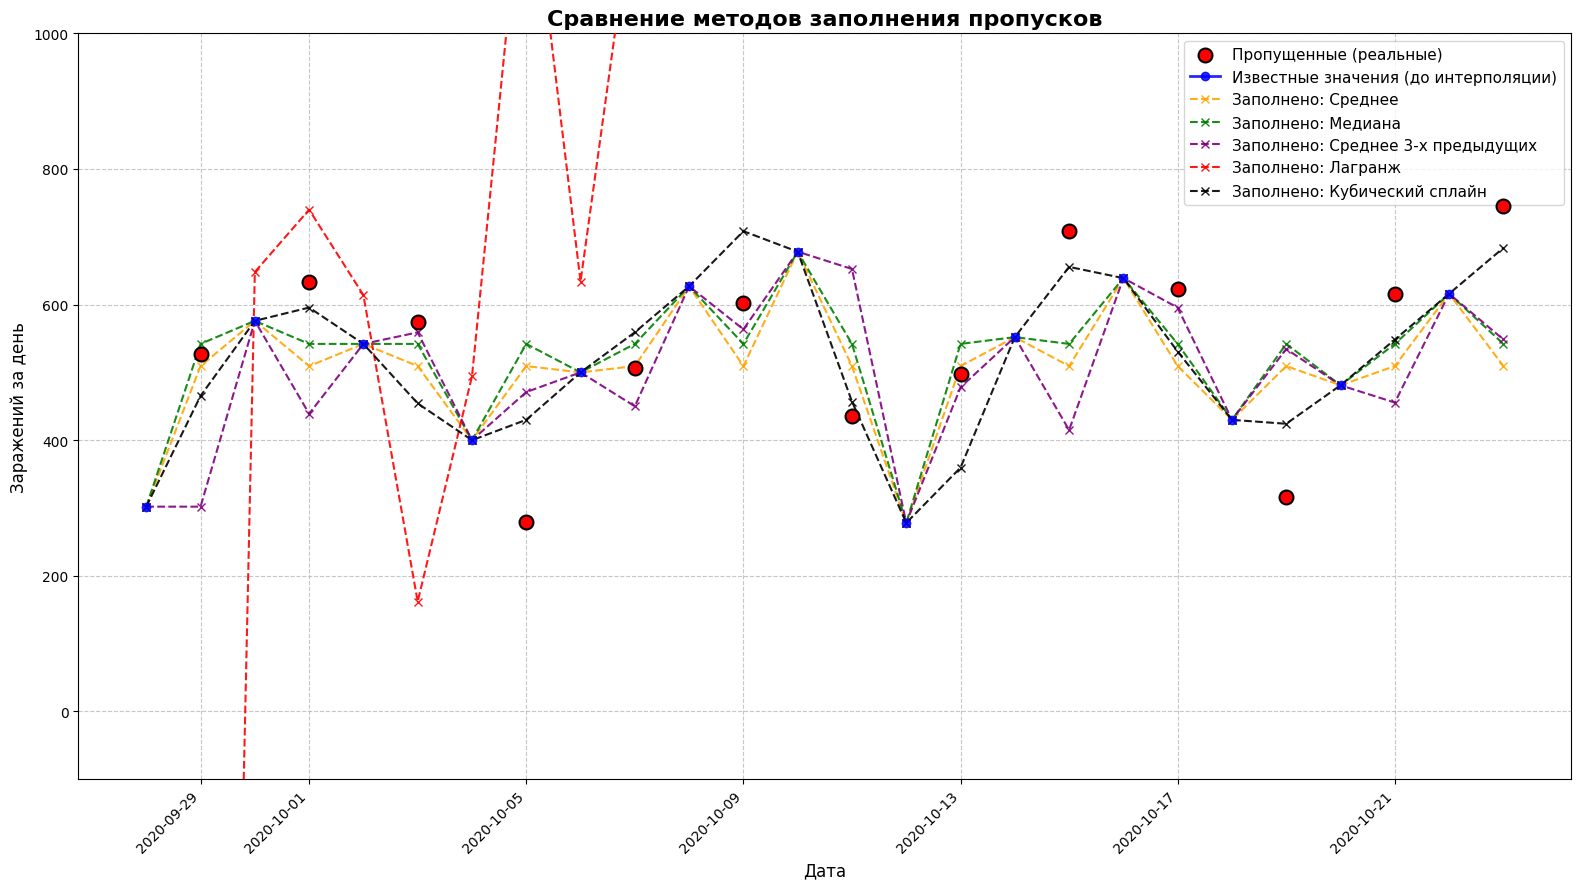

In [ ]:
methods_cols = [
    f'{TARGET_COL} (Среднее)',
    f'{TARGET_COL} (Медиана)',
    f'{TARGET_COL} (Среднее по 3м предыдущим)',
    f'{TARGET_COL} (Лагранж)',
    f'{TARGET_COL} (Кубический сплайн)'
]

method_names = ['Среднее', 'Медиана', 'Среднее 3-х предыдущих', 'Лагранж', 'Кубический сплайн']
colors = ['orange', 'green', 'purple', 'red', 'black']

plt.figure(figsize=(16, 9))

# Реальные значения (красные точки)
missing_mask = df_sparse[TARGET_COL].isna()
real_missing_values = df_original.loc[missing_mask, TARGET_COL]

plt.scatter(df_filled.loc[missing_mask, DATE_COL],
            real_missing_values,
            color='red', label='Пропущенные (реальные)',
            zorder=20, s=100, edgecolor='black', linewidth=1.5)

# Известные значения (синяя линия)
plt.plot(df_filled[DATE_COL], df_filled[TARGET_COL], 'o-', label='Известные значения (до интерполяции)',
         color='blue', linewidth=2, alpha=0.85, zorder=10)

# Заполненные значения (пунктирные линии)
for filled_col, name, color in zip(methods_cols, method_names, colors):
    plt.plot(df_filled[DATE_COL], df_filled[filled_col], 'x--', label=f'Заполнено: {name}',
             color=color, linewidth=1.5, alpha=0.9, markersize=6, zorder=5)

plt.title(f'Сравнение методов заполнения пропусков', fontsize=16, fontweight='bold')
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Заражений за день', fontsize=12)
plt.legend(loc='upper right', fontsize=11)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.ylim(top=1000, bottom = -100)
plt.show()

# Анализ выбросов

## Метод 2/3 сигма

In [ ]:
mean_val = df_original[TARGET_COL].mean()
std_val = df_original[TARGET_COL].std()
print(f"Среднее: {mean_val}, Стандартное отклонение: {std_val}")

# 2 сигмы
lower_2s = mean_val - 2 * std_val
upper_2s = mean_val + 2 * std_val
outliers_2s = df_original[(df_original[TARGET_COL] < lower_2s) | (df_original[TARGET_COL] > upper_2s)]
print(f"Выбросы (2σ): {len(outliers_2s)} точек из {df_original[TARGET_COL].shape[0]}")

# 3 сигмы
lower_3s = mean_val - 3 * std_val
upper_3s = mean_val + 3 * std_val
outliers_3s = df_original[(df_original[TARGET_COL] < lower_3s) | (df_original[TARGET_COL] > upper_3s)]
print(f"Выбросы (3σ): {len(outliers_3s)} точек из {df_original[TARGET_COL].shape[0]}")

if len(outliers_3s) > 0:
    print(outliers_3s[['Datetime', TARGET_COL]])

Среднее: 526.3076923076923, Стандартное отклонение: 131.08280412953312
Выбросы (2σ): 0 точек из 26
Выбросы (3σ): 0 точек из 26


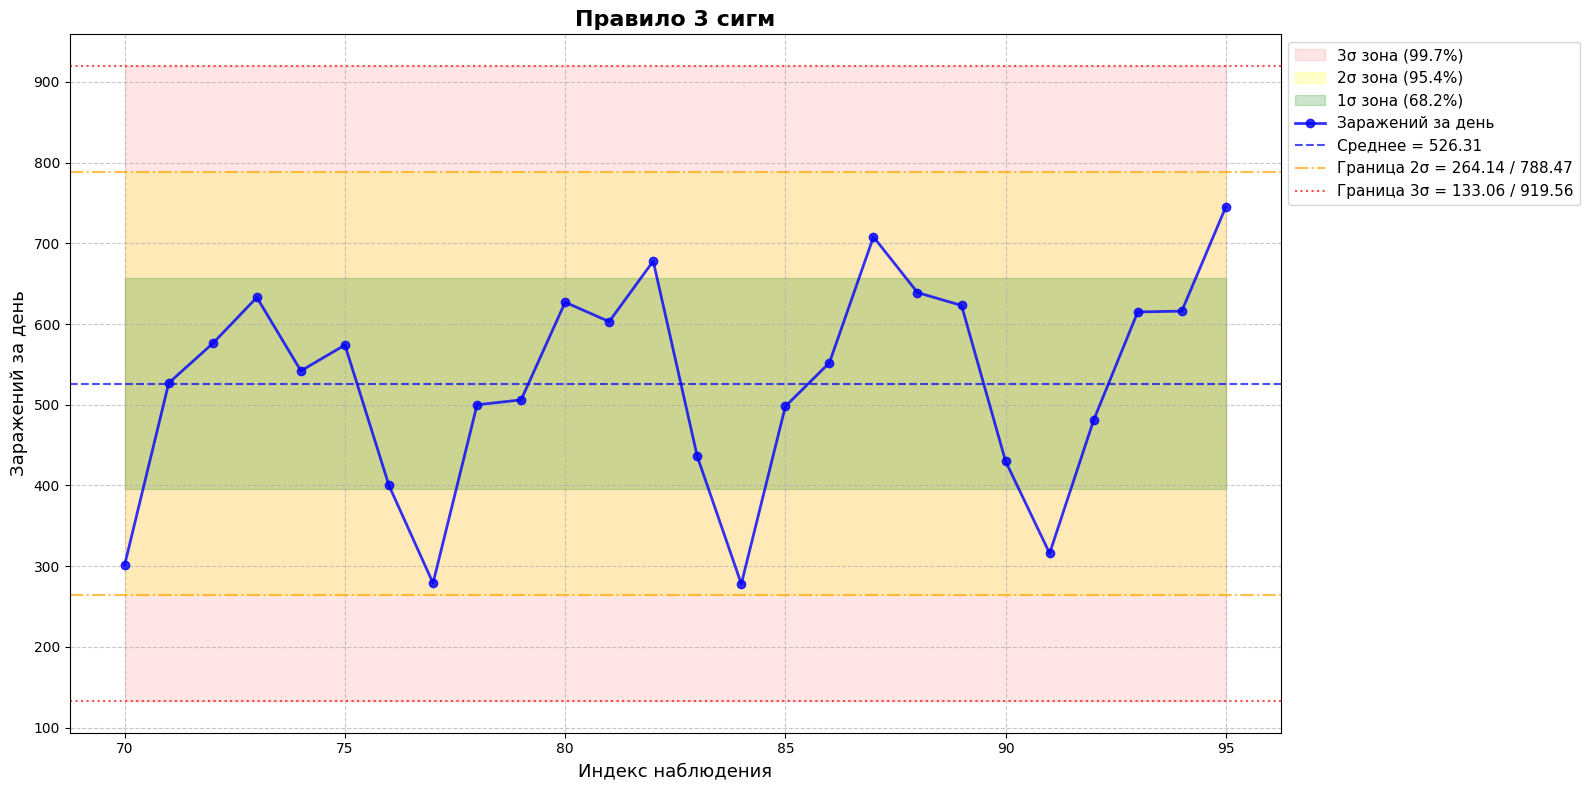

In [ ]:
plt.figure(figsize=(16, 8))

# Границы
lower_1s = mean_val - std_val
upper_1s = mean_val + std_val

# Зоны (заливка)
plt.fill_between(df_original.index, lower_3s, upper_3s, color='red', alpha=0.1, label='3σ зона (99.7%)')
plt.fill_between(df_original.index, lower_2s, upper_2s, color='yellow', alpha=0.2, label='2σ зона (95.4%)')
plt.fill_between(df_original.index, lower_1s, upper_1s, color='green', alpha=0.2, label='1σ зона (68.2%)')

# Основной ряд
plt.plot(df_original.index, df_original[TARGET_COL], 'o-', color='blue', label=TARGET_COL, linewidth=2, alpha=0.8)

# Выбросы
outliers_2to3 = df_original[
    ((df_original[TARGET_COL] < lower_2s) & (df_original[TARGET_COL] >= lower_3s)) |
    ((df_original[TARGET_COL] > upper_2s) & (df_original[TARGET_COL] <= upper_3s))
]

if not outliers_3s.empty:
    plt.scatter(outliers_3s.index, outliers_3s[TARGET_COL],
                color='red', s=120, edgecolor='black', linewidth=1.5,
                label='Выбросы (>3σ)', zorder=5)

if not outliers_2to3.empty:
    plt.scatter(outliers_2to3.index, outliers_2to3[TARGET_COL],
                color='orange', s=100, edgecolor='black', linewidth=1,
                label='Аномалии (2σ–3σ)', zorder=5)

# Горизонтальные линии
plt.axhline(mean_val, color='blue', linestyle='--', label=f'Среднее = {mean_val:.2f}', alpha=0.7)
plt.axhline(lower_2s, color='orange', linestyle='-.', label=f'Граница 2σ = {lower_2s:.2f} / {upper_2s:.2f}', alpha=0.7)
plt.axhline(upper_2s, color='orange', linestyle='-.', alpha=0.7)
plt.axhline(lower_3s, color='red', linestyle=':', label=f'Граница 3σ = {lower_3s:.2f} / {upper_3s:.2f}', alpha=0.7)
plt.axhline(upper_3s, color='red', linestyle=':', alpha=0.7)

plt.title(f'Правило 3 сигм',
          fontsize=16, fontweight='bold')
plt.xlabel('Индекс наблюдения', fontsize=13)
plt.ylabel(TARGET_COL, fontsize=13)
plt.legend(loc='upper left', fontsize=11, bbox_to_anchor=(1, 1))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Диаграммы размаха

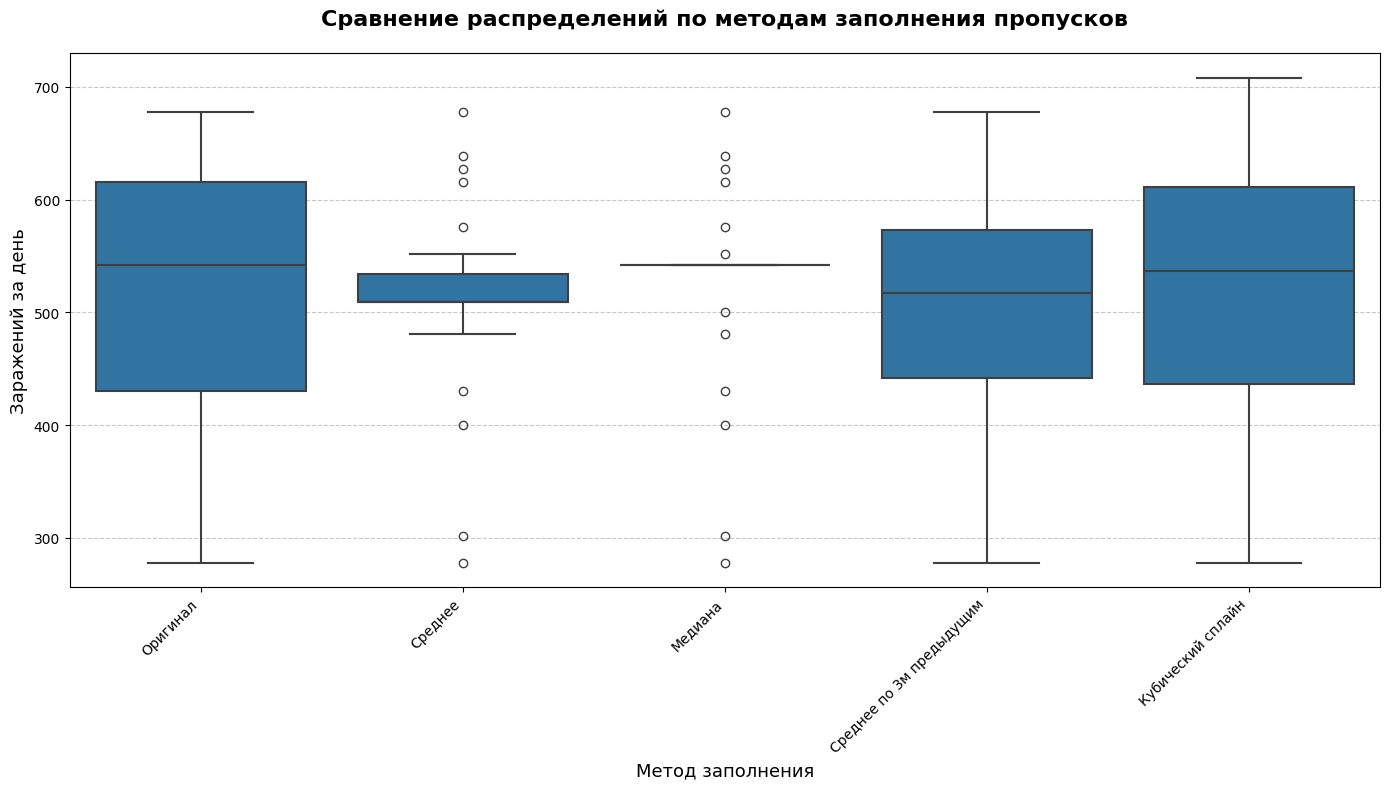

In [ ]:
# Список столбцов для сравнения
columns_to_plot = [
    TARGET_COL,  # оригинал
    f'{TARGET_COL} (Среднее)',
    f'{TARGET_COL} (Медиана)',
    f'{TARGET_COL} (Среднее по 3м предыдущим)',
    f'{TARGET_COL} (Кубический сплайн)',

]

# Переименуем для красивых подписей на графике
method_labels = [
    'Оригинал',
    'Среднее',
    'Медиана',
    'Среднее по 3м предыдущим',
    'Кубический сплайн'
]

# Подготовим данные для seaborn: "длинный" формат
df_melted = df_filled[columns_to_plot].melt(var_name='Метод', value_name='Value')
df_melted['Метод'] = df_melted['Метод'].replace(dict(zip(columns_to_plot, method_labels)))

# Построение
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_melted, x='Метод', y='Value', linewidth=1.5)

plt.title(f'Сравнение распределений по методам заполнения пропусков', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Метод заполнения', fontsize=13)
plt.ylabel(TARGET_COL, fontsize=13)
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

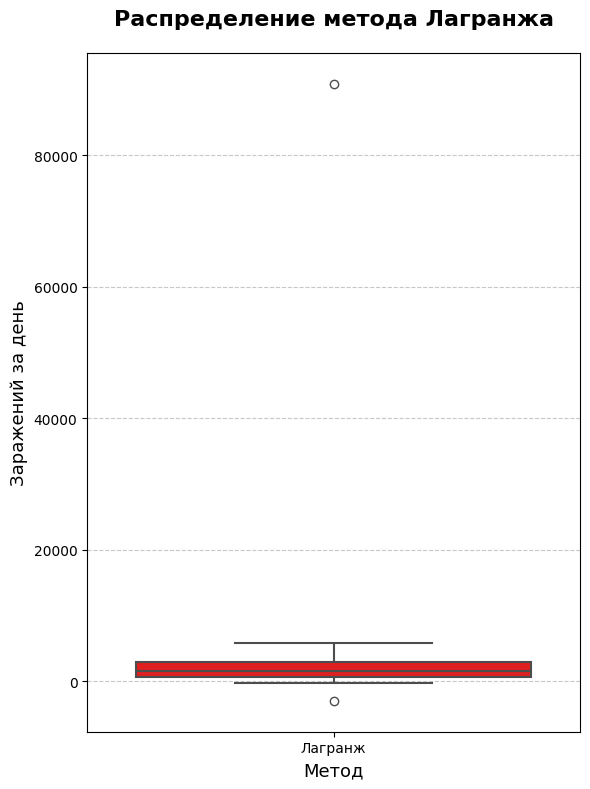

In [ ]:
plt.figure(figsize=(6, 8))

df_lagrange = pd.DataFrame({'Метод': 'Лагранж', 'Value': df_filled[f'{TARGET_COL} (Лагранж)']})
sns.boxplot(data=df_lagrange, x='Метод', y='Value', linewidth=1.5, color='red')

plt.title(f'Распределение метода Лагранжа',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Метод', fontsize=13)
plt.ylabel(TARGET_COL, fontsize=13)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
df_filled.head()

,Дата,Заражений за день,Заражений за день (Среднее),Заражений за день (Медиана),Заражений за день (Среднее по 3м предыдущим),Заражений за день (Лагранж),Заражений за день (Кубический сплайн)
70,2020-09-28,302.0,302.000000,302.0,302.0,-230.0,302.000000
71,2020-09-29,NaN,509.307692,542.0,302.0,-3016.0,465.297521
72,2020-09-30,576.0,576.000000,576.0,576.0,648.0,576.000000
73,2020-10-01,NaN,509.307692,542.0,439.0,740.0,595.607437
74,2020-10-02,542.0,542.000000,542.0,542.0,614.0,542.000000
